In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mpmath as mp

In [2]:
m = 1
hbar = 1
E = -120.26

In [3]:
v = 2*np.sqrt(2*m*(70-E))/hbar

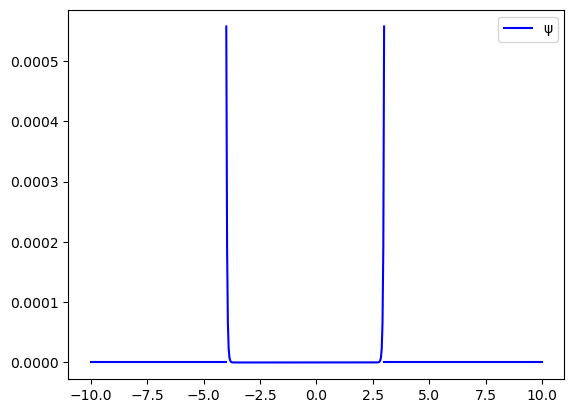

In [7]:
def u_left(x):
    return (4/hbar) * mp.e**((4+x)/2) * mp.sqrt(35*m)
    
def u_right(x):
    return (4/hbar) * mp.e**((3-x)/2) * mp.sqrt(35*m)

# funkcja falowa w regionie x< x1
def psi_left(x, C1=1.0, C2=0.0):
    u = u_left(x)
    return C1*mp.besselj(v, u) + C2*mp.bessely(v, u)

def psi_right(x, C1=1.0, C2=0.0):
    u = u_right(x)
    return C1*mp.besselj(v, u) + C2*mp.bessely(v, u)

def z_fun(x): return 2*(5)**0.25*(x+0.5)
    
def v_parab(E): return 0.5*(1/np.sqrt(5)*(122.5+E)-1)

def psi_center(x, C1=1.0, C2=1.0):
    v = v_parab(E)
    z = z_fun(x)
    
    val1, _ = pbdv(v, z)
    val2, _ = pbdv(v, -z)
    
    return C1*val1 + C2*val2


# przykładowe wartości
xs_left = np.linspace(-10, -4, 200)   # realna siatka
xs_right = np.linspace(3, 10, 200)
ys_left = [psi_left(x) for x in xs_left]
ys_right = [psi_right(x) for x in xs_right]

xs_center = np.linspace(-4, 3, 200)
ys_center = [psi_center(x) for x in xs_center]

plt.plot(xs_left, np.abs(ys_left)**2, color='blue', label="ψ")
plt.plot(xs_right, np.abs(ys_right)**2, color='blue')
plt.plot(xs_center, 2e-20*np.abs(ys_center)**2, color='blue')
plt.legend()
plt.show()

In [6]:
import numpy as np
from scipy.special import jv, jvp, pbdv
from scipy.optimize import minimize_scalar
import math

# parametry (ustalone przez Ciebie)
m = 1.0
hbar = 1.0
x1, x2 = -4.0, 3.0

# funkcje pomocnicze (u bez zależności od E - zgodnie z wcześniejszymi definicjami)
def u_left(x): return 4/hbar * math.exp((x+4)/2) * math.sqrt(35*m)
def u_right(x): return 4/hbar * math.exp((3-x)/2) * math.sqrt(35*m)
def z_fun(x): return 2*(5*m/hbar**2)**0.25*(x+0.5)
def v_bessel(E): return 2*np.sqrt(2*m*(70 - E))/hbar
def v_parab(E): return 0.5*(1/hbar*np.sqrt(m/5)*(122.5+E)-1)

def Dv(v, z):
    val, _ = pbdv(v, z)   # scipy funkcja
    return val

def Dvp(v, z):
    _, val = pbdv(v, z)
    return val

def Jv(v, u): return jv(v, u)
def Jvp(v, u): return jvp(v, u)

def determinant(E):
    try:
        v1 = v_bessel(E)
        v2 = v_parab(E)
        u1 = u_left(x1); u2 = u_right(x2)
        z1 = z_fun(x1); z2 = z_fun(x2)
        alpha = 2*(5*m/hbar**2)**0.25
        du1dx = u1/2; du2dx = -u2/2

        M = np.zeros((4,4), dtype=complex)
        M[0,:] = [Jv(v1, u1), -Dv(v2, z1), -Dv(v2, -z1), 0]
        M[1,:] = [du1dx*Jvp(v1, u1), -alpha*Dvp(v2, z1), alpha*Dvp(v2, -z1), 0]
        M[2,:] = [0, -Dv(v2, z2), -Dv(v2, -z2), Jv(v1, u2)]
        M[3,:] = [0, -alpha*Dvp(v2, z2), alpha*Dvp(v2, -z2), du2dx*Jvp(v1, u2)]
        return np.linalg.det(M)
    except Exception:
        return np.nan + 1j*np.nan

# skan i wykrywanie lokalnych minimów |det|
Es = np.linspace(-122.5, 70, 9000)   # gęsta siatka
det_vals = np.array([determinant(E) for E in Es])
abs_vals = np.abs(det_vals)

min_idx = [i for i in range(1, len(Es)-1) if np.isfinite(abs_vals[i])
           and abs_vals[i] < abs_vals[i-1] and abs_vals[i] < abs_vals[i+1]]

candidates = []
for i in min_idx:
    a = Es[max(0, i-1)]
    b = Es[min(len(Es)-1, i+1)]
    res = minimize_scalar(lambda E: np.abs(determinant(E)), bounds=(a,b), method='bounded', options={'xatol':1e-10})
    Eopt = res.x
    val = np.abs(determinant(Eopt))
    candidates.append((Eopt, val))

In [8]:
# filtruj po tolerancji i posortuj
threshold = 1e-10   # dostosuj: mniejsze -> dokładniejsze wymagania
good = [c for c in candidates if np.isfinite(c[1])]
print("Najlepsze minima |det| (E, |det|):")
for e, v in good:
    flag = "<-- możliwe E" if v < threshold else ""
    #print(f"{e:.12f}, {v:.3e} {flag}")

Najlepsze minima |det| (E, |det|):


In [9]:
np.mean([1,2,4])

np.float64(2.3333333333333335)

Clusters found: 96
96 1 members; range:  -120.263932  -120.263932
94 1 members; range:  -115.791796  -115.791796
95 1 members; range:  -111.319660  -111.319660
91 1 members; range:  -106.847524  -106.847524
92 1 members; range:  -102.375388  -102.375388
93 1 members; range:   -97.903253   -97.903253
85 1 members; range:   -93.431116   -93.431116
86 1 members; range:   -88.958981   -88.958981
90 1 members; range:   -84.486844   -84.486844
89 1 members; range:   -80.014708   -80.014708
87 1 members; range:   -75.542572   -75.542572
88 1 members; range:   -71.070437   -71.070437
83 1 members; range:   -66.598300   -66.598300
84 1 members; range:   -62.126166   -62.126166
1 1 members; range:   -57.654030   -57.654030
2 1 members; range:   -56.927677   -56.927677
5 1 members; range:   -54.635910   -54.635910
3 1 members; range:   -53.181965   -53.181965
4 1 members; range:   -52.455471   -52.455471
8 1 members; range:   -50.164748   -50.164748
7 1 members; range:   -48.710307   -48.710307
6

C:\Users\Maciej\AppData\Local\Temp\ipykernel_21448\1219192459.py:15: RuntimeWarning: invalid value encountered in sqrt
  def v_bessel(E): return 2*np.sqrt(2*m*(70 - E))/hbar


NameError: name 'refined_sorted' is not defined

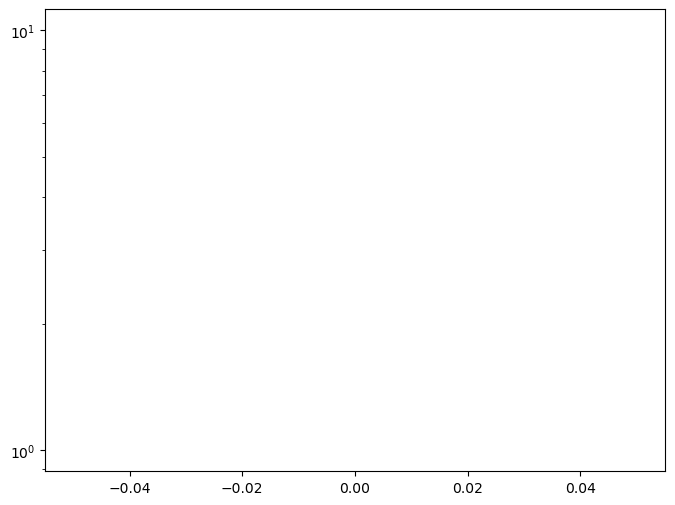

In [10]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.optimize import minimize_scalar, root
import matplotlib.pyplot as plt

# --- Wstaw tu swoją funkcję determinant(E) --------------------------------
# def determinant(E): ...
# ----------------------------------------------------------------------------

# przykładowa lista kandydatów (zamień na swoją listę)
candidates = np.array(good)[:,0]

# 1) CLUSTERING (hierarchiczne) --------------------------------------------
# threshold = maksymalna odległość (w energy units) by łączyć w jeden klaster
threshold = 0.5   # dostosuj: 0.5..1.5 typowe; zmniejsz jeśli chcesz bardziej konserwatywnie
Z = linkage(candidates.reshape(-1,1), method='single')  # single / complete / average
labels = fcluster(Z, t=threshold, criterion='distance')

clusters = {}
for lab, val in zip(labels, candidates):
    clusters.setdefault(lab, []).append(val)

print("Clusters found:", len(clusters))
for k,v in clusters.items():
    print(f"{k} {len(v)} members; range: {min(v):12.6f} {max(v):12.6f}")

# 2) REFINEMENT: dla każdego klastra uruchom lokalną minimalizację |det(E)| ----
refined = []
for k, vals in clusters.items():
#    a = min(vals) - 1.0   # rozszerz przedział lokalny o margines
#    b = max(vals) + 1.0
    # ogranicz do zakresu wcześniej badanych energii, jeśli chcesz
#    res = minimize_scalar(lambda E: np.abs(determinant(E)), bounds=(a,b), method='bounded')
#    Eopt = res.x
    refined.append(np.mean(vals))
#    det_val = determinant(Eopt)
#    abs_det = np.abs(det_val)
    
#    if abs_det < 1e-8:
#        print(f"Stan związany: E = {Eopt:.10f}, |det| = {abs_det:.2e}")
    

# 3) SORTUJ wynik po |det| (najlepsze u góry) i wypisz -----------------------
print("\nRefined candidates (sorted by |det|):")
for r in refined:
    print(f"{r:.6f}")

# 4) PLOT diagnostyczny (opcjonalny) ----------------------------------------
# Jeżeli chcesz widok |det| w okolicy każdego wyniku:
plt.figure(figsize=(8,6))
Es = np.linspace(min(candidates)-2, max(candidates)+2, 2000)
vals = np.array([np.abs(determinant(E)) for E in Es])
plt.yscale('log')
plt.plot(Es, vals, '-', lw=0.7)
for r in refined_sorted:
    plt.axvline(r['E_minimize'], color='red', alpha=0.6)
    if r['E_root'] is not None:
        plt.axvline(r['E_root'], color='green', linestyle='--', alpha=0.8)
plt.xlabel("E")
plt.ylabel("|det(E)| (log scale)")
plt.title("Diagnostyka minimów det")
plt.grid(True, which='both', ls=':', alpha=0.4)
plt.show()


In [172]:
len(refined)

106

In [71]:
np.shape(np.array(good)[:,0])

(1058,)

In [70]:
l = good[:,0]

TypeError: list indices must be integers or slices, not tuple